<a href="https://colab.research.google.com/github/Vita112/jaist_hw/blob/main/s2310041.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import loadmat
from sklearn import svm
from sklearn.metrics import accuracy_score

# Abstract


*   This source code contains 4 parts. For part1~part3, same dataset of 3 size is used. For part4, I use existing sklearn dataset.



In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# 1. SMALL DATA -- Linear SVM compared wiht  Decision Tree, Naive Bayes
### 1.1 prepare dataset

In [ ]:
mat = loadmat("/content/drive/MyDrive/ColabNotebooks/s2310041/ex6data1.mat")
mat.keys()
X = mat["X"]
y = mat["y"]
X.shape
y.shape
X[:9]
y[:9]

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

(51, 2)

(51, 1)

array([[1.9643, 4.5957],
       [2.2753, 3.8589],
       [2.9781, 4.5651],
       [2.932 , 3.5519],
       [3.5772, 2.856 ],
       [4.015 , 3.1937],
       [3.3814, 3.4291],
       [3.9113, 4.1761],
       [2.7822, 4.0431]])

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1]], dtype=uint8)

<Figure size 800x600 with 0 Axes>

Text(0.5, 0, 'x1')

Text(0, 0.5, 'x2')

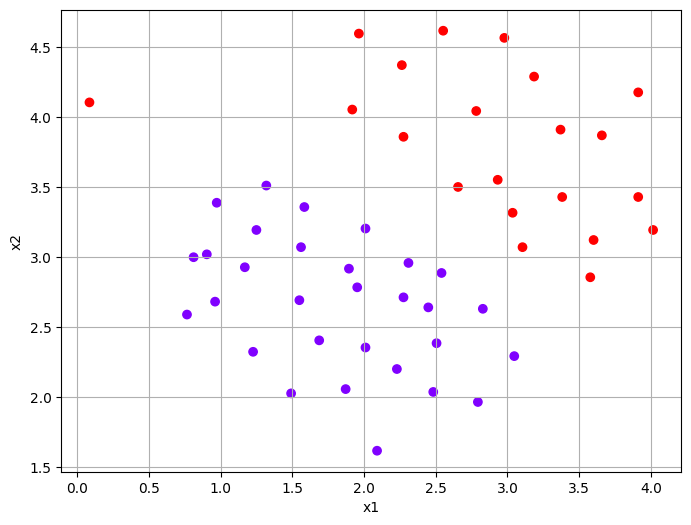

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c=y.flatten(), cmap="rainbow")
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid(True)
plt.show()

In [ ]:
# create data in order to plot the contour
x1_min, x1_max = X[:, 0].min() * 1.2, X[:, 0].max() * 1.1
x2_min, x2_max = X[:, 1].min() * 1.1, X[:, 1].max() * 1.1
# np.linspace(x1_min, x1_max, 500): return evenly spaced numbers over a specified interval.  (500,)
# np.meshgrig: given 1-D arrays representing the coordinates of a grid, return a list of coordinate metrices.
x1, x2 = np.meshgrid(np.linspace(x1_min, x1_max, 500), np.linspace(x2_min, x2_max, 500))       # (500, 500), (500, 500)
# numpy.ravel(a, order='C'): return a contiguous flattened array, which is equivalent to reshape(-1, order=order)
# np.c_: concatenate two metrices along the second axis, the number of rows is equal.
data = np.c_[x1.ravel(), x2.ravel()]             # (250000,2)
data[:9]

array([[0.103686  , 1.77947   ],
       [0.11232891, 1.77947   ],
       [0.12097183, 1.77947   ],
       [0.12961474, 1.77947   ],
       [0.13825766, 1.77947   ],
       [0.14690057, 1.77947   ],
       [0.15554348, 1.77947   ],
       [0.1641864 , 1.77947   ],
       [0.17282931, 1.77947   ]])

### 1.1 Linear SVM


C plays a role similar to λ, where λ is the regularization parameter commonly used in logistic regression.

A large C parameter tells the SVM to try to classify all the examples correctly.But, it's very easy to encounter overfitting.

In [ ]:
# build 2 classifiers with different regularization value

# C: the strength of regularization is inversely proportional to C. Must be strictly positive.
models = [svm.SVC(C=C, kernel='linear') for C in [1, 100]]        # kernel type: linear, poly, rbf, sigmoid, precomputed, default is rbf.
clfs = [model.fit(X, y.ravel()) for model in models]   # (51,2) (51,)

<Figure size 800x500 with 0 Axes>

Text(0.5, 0, 'x1')

Text(0, 0.5, 'x2')

Text(0.5, 1.0, 'SVM Decision Boundary with C=1')

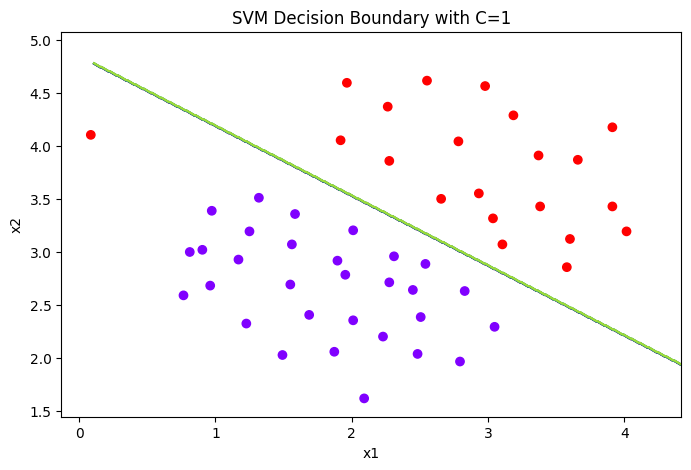

<Figure size 800x500 with 0 Axes>

Text(0.5, 0, 'x1')

Text(0, 0.5, 'x2')

Text(0.5, 1.0, 'SVM Decision Boundary with C=100')

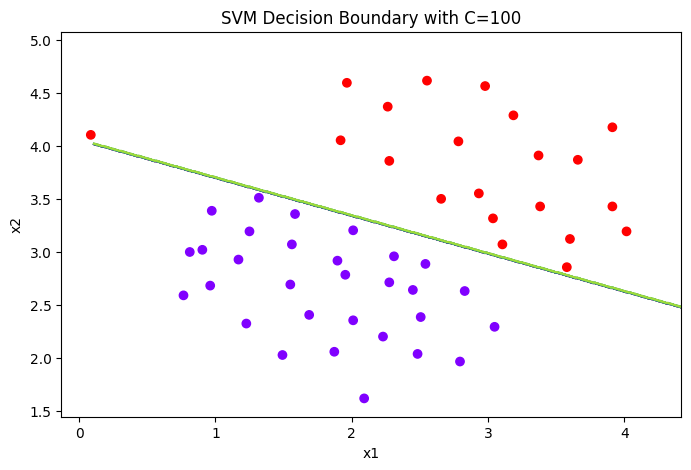

In [ ]:
titles = [f"SVM Decision Boundary with C={C}" for C in [1,100]]
for clf ,title in zip(clfs, titles):
  plt.figure(figsize=(8,5))
  plt.scatter(X[:, 0], X[:, 1], c=y.flatten(), cmap="rainbow")
  plt.xlabel("x1")
  plt.ylabel("x2")
  Z = clf.predict(data)                     # use trained clf to do prediction on the created 25000 instance.
  # print(f'shape of Z is {Z.shape}')      # (250000,)
  Z = Z.reshape(x1.shape)                  # reshape predicted results as the same shape as x1 to plot the decision boundary.
  plt.contour(x1, x2, Z)                   # plot out the boundary (500, 500),(500, 500),(500, 500)
  plt.title(title)
  plt.show()



In [ ]:
# calculate mean score, model with C=100 is better
score_51 = [model.score(X, y) for model in models]
score_250k = [model.score(data, Z.ravel()) for model in models]
score_51
score_250k

[0.9803921568627451, 1.0]

[0.898624, 1.0]

### 1.2 Decission Tree

<Figure size 800x600 with 0 Axes>

Text(0.5, 0, 'x1')

Text(0, 0.5, 'x2')

shape of Z_dt is (250000,)


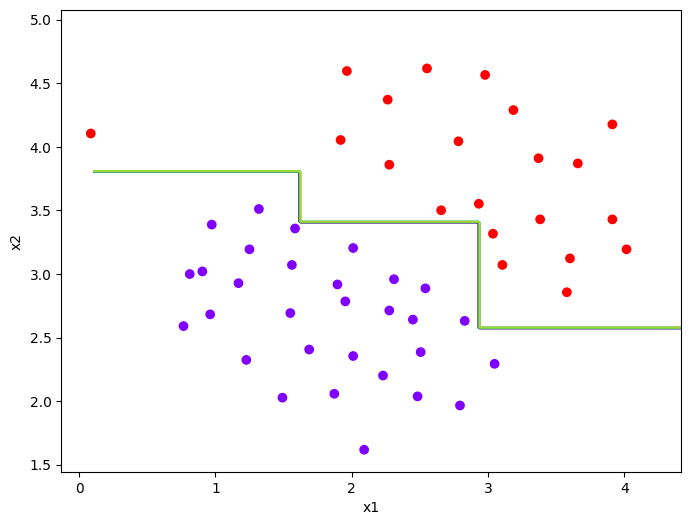

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(criterion="entropy")
dt_clf = dt_model.fit(X, y.flatten())

plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c=y.flatten(), cmap="rainbow")
plt.xlabel("x1")
plt.ylabel("x2")
Z_dt = dt_clf.predict(data)                   # use trained clf to do prediction on the created 25000 instance.
print(f'shape of Z_dt is {Z_dt.shape}')        # (250000,)
Z_dt = Z_dt.reshape(x1.shape)                   # reshape predicted results as the same shape as x21 to plot the decision boundary.
plt.contour(x1, x2,Z_dt)
plt.show()

### 1.3 Naive Bayes


<Figure size 800x600 with 0 Axes>

Text(0.5, 0, 'x1')

Text(0, 0.5, 'x2')

shape of Z_bayes is (250000,)


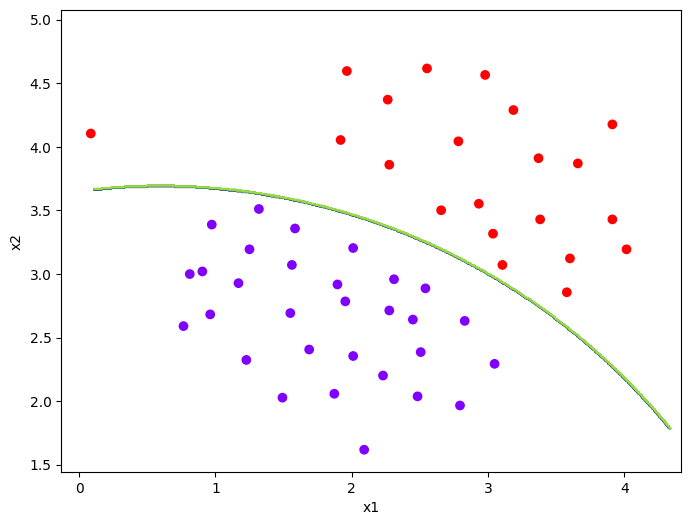

In [ ]:
from sklearn.naive_bayes import GaussianNB

bayes_model = GaussianNB()
bayes_clf = bayes_model.fit(X, y.flatten())

plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c=y.flatten(), cmap="rainbow")
plt.xlabel("x1")
plt.ylabel("x2")
Z_bayes = bayes_clf.predict(data)                   # use trained clf to do prediction on the created 25000 instance.
print(f'shape of Z_bayes is {Z_bayes.shape}')        # (250000,)
Z_bayes = Z_bayes.reshape(x1.shape)                   # reshape predicted results as the same shape as x21 to plot the decision boundary.
plt.contour(x1, x2, Z_bayes)
plt.show()

# 2. LARGER DATA -- Gaussian kernel SVM compared with Naive Bayes, Decision Tree








###  2.1 SVM with Gaussian kernels

$$K(x^{(i)},x^{(j)}) = exp(-\frac{||x^{(i)}-x^{(j)}||^{2}}{2σ^{2}})$$

$||x^{(i)}-x^{(j)}||^{2}$ means the squared Euclidean distance between the two feature vectors. $γ = \frac{1}{2σ^{2}}$ .

the value of the RBF kernel decreases with distance and ranges between zero (in the limit) and one (when x = x').

In [ ]:
def GaussKernel(x1, x2, sigma):
    return np.exp(-(x1 - x2) ** 2).sum() / (2 * sigma ** 2)
GaussKernel(np.array([1, 2, 1]), np.array([0, 4, -1]), 2.)

0.05056383986861383

In [105]:
mat2 = loadmat("/content/drive/MyDrive/ColabNotebooks/s2310041/ex6data2.mat")   # 863 samples
mat2.keys()
X2, y2= mat2["X"][:764], mat2["y"][:764]
X2_eval, y2_eval = mat2["X"][764:], mat2["y"][764:]
X2.shape
y2.shape
X2_eval.shape
y2_eval.shape

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

(764, 2)

(764, 1)

(99, 2)

(99, 1)

<Figure size 800x600 with 0 Axes>

Text(0.5, 0, 'x1')

Text(0, 0.5, 'x2')

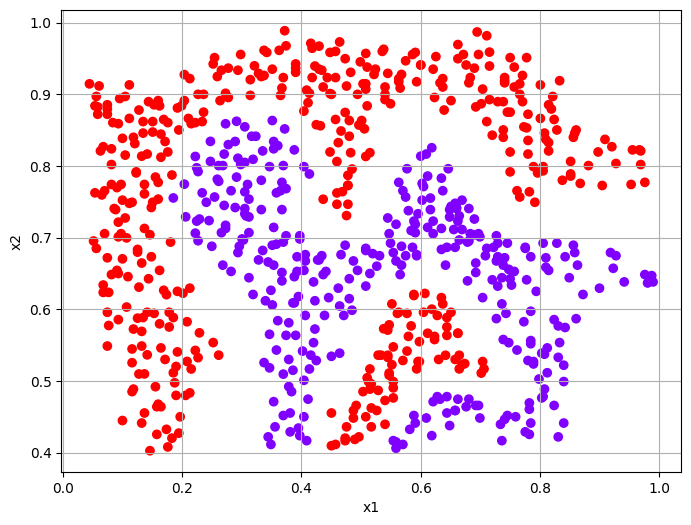

In [106]:
plt.figure(figsize=(8,6))
plt.scatter(X2[:, 0], X2[:, 1], c=y2.flatten(), cmap="rainbow")
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid(True)
plt.show()

In [108]:
# buid the model
sigma = 0.1
gamma = np.power(sigma, -2)/2   # kernel coefficient for rbf, poly, sigmoid.


model2 = svm.SVC(C=1, kernel="rbf" , gamma=gamma)
clf2 = model2.fit(X2, y2.flatten())

model2_lnr = svm.SVC(C=1, kernel="linear" , gamma=gamma)
clf2_lnr = model2_lnr.fit(X2, y2.flatten())



In [120]:
pred_eval = clf2.predict(X2_eval)
acc = accuracy_score(y2_eval, pred_eval)
print(f"accuracy with svm-rbf is {acc:.4f}")
print("\n")
pred_eval_lnr = clf2_lnr.predict(X2_eval)
acc_lnr = accuracy_score(y2_eval, pred_eval_lnr)
print(f"accuracy with svm-linear is {acc_lnr:.4f}")

accuracy with svm-rbf is 0.3434


accuracy with svm-linear is 0.0606


In [111]:
# create new data
x21_min, x21_max = X2[:, 0].min() * 1.2, X2[:, 0].max() * 1.1
x22_min, x22_max = X2[:, 1].min() * 1.1, X2[:, 1].max() * 1.1
x21, x22 = np.meshgrid(np.linspace(x21_min, x21_max, 500), np.linspace(x22_min, x22_max, 500))       # (500, 500), (500, 500)
data2 = np.c_[x21.ravel(), x22.ravel()]                                                              # (250000,2)
data2[:9]

array([[0.05391708, 0.4428952 ],
       [0.05599058, 0.4428952 ],
       [0.05806408, 0.4428952 ],
       [0.06013758, 0.4428952 ],
       [0.06221108, 0.4428952 ],
       [0.06428459, 0.4428952 ],
       [0.06635809, 0.4428952 ],
       [0.06843159, 0.4428952 ],
       [0.07050509, 0.4428952 ]])

<Figure size 800x600 with 0 Axes>

Text(0.5, 0, 'x21')

Text(0, 0.5, 'x22')

shape of Z2 is (250000,)


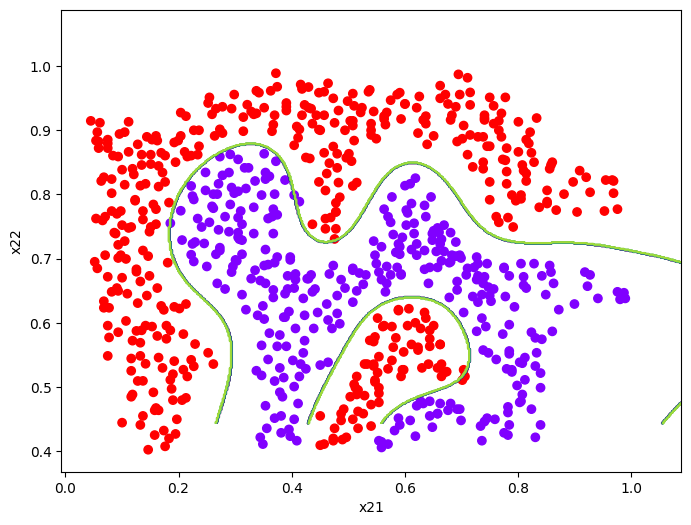

In [112]:
plt.figure(figsize=(8,6))
plt.scatter(X2[:, 0], X2[:, 1], c=y2.flatten(), cmap="rainbow")
plt.xlabel("x21")
plt.ylabel("x22")
Z2 = clf2.predict(data2)                   # use trained clf to do prediction on the created 25000 instance.
print(f'shape of Z2 is {Z2.shape}')        # (250000,)
Z2 = Z2.reshape(x21.shape)                   # reshape predicted results as the same shape as x21 to plot the decision boundary.
plt.contour(x21, x22, Z2)
plt.show()

### 2.2 Naive Bayes


<Figure size 800x600 with 0 Axes>

Text(0.5, 0, 'x21')

Text(0, 0.5, 'x22')

shape of Z2_bayes is (250000,)


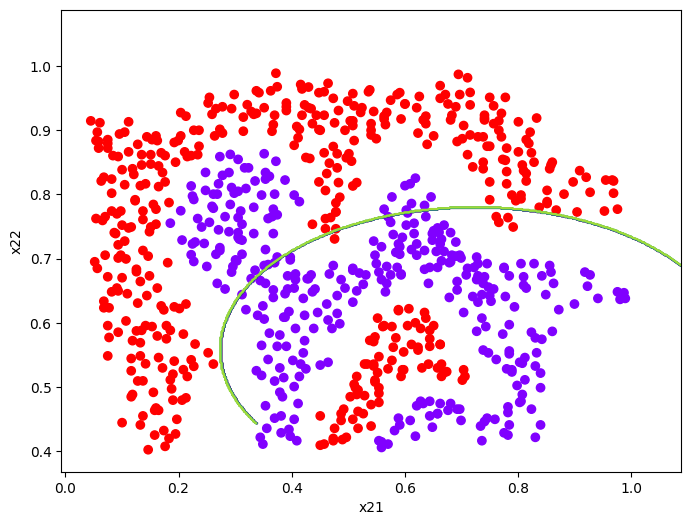

In [113]:
from sklearn.naive_bayes import GaussianNB

bayes_model2 = GaussianNB()
bayes_clf2 = bayes_model2.fit(X2, y2.flatten())

plt.figure(figsize=(8,6))
plt.scatter(X2[:, 0], X2[:, 1], c=y2.flatten(), cmap="rainbow")
plt.xlabel("x21")
plt.ylabel("x22")
Z2_bayes = bayes_clf2.predict(data2)                   # use trained clf to do prediction on the created 25000 instance.
print(f'shape of Z2_bayes is {Z2_bayes.shape}')        # (250000,)
Z2_bayes = Z2_bayes.reshape(x21.shape)                   # reshape predicted results as the same shape as x21 to plot the decision boundary.
plt.contour(x21, x22, Z2_bayes)
plt.show()

In [114]:
pred_eval = bayes_clf2.predict(X2_eval)
acc = accuracy_score(y2_eval, pred_eval)
acc

0.12121212121212122

### 2.3 Decison Tree


<Figure size 800x600 with 0 Axes>

Text(0.5, 0, 'x21')

Text(0, 0.5, 'x22')

shape of dt_clf2 is (250000,)


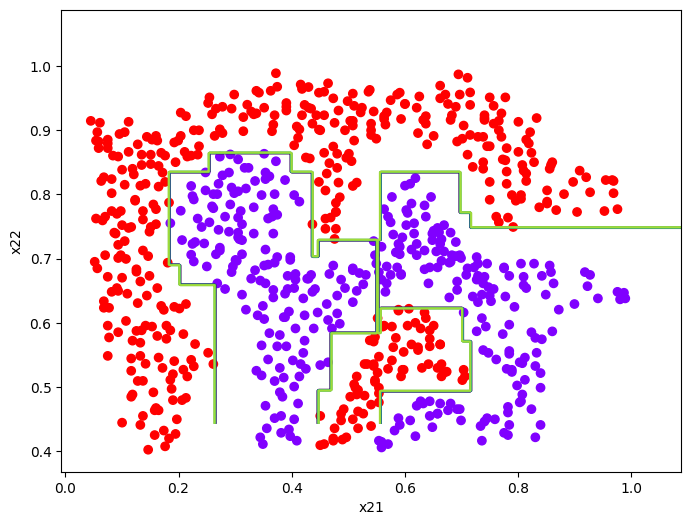

In [115]:
dt_model2 = DecisionTreeClassifier(criterion="entropy")
dt_clf2 = dt_model2.fit(X2, y2.flatten())

plt.figure(figsize=(8,6))
plt.scatter(X2[:, 0], X2[:, 1], c=y2.flatten(), cmap="rainbow")
plt.xlabel("x21")
plt.ylabel("x22")
Z2_dt = dt_clf2.predict(data2)                   # use trained clf to do prediction on the created 25000 instance.
print(f'shape of dt_clf2 is {Z2_dt.shape}')        # (250000,)
Z2_dt = Z2_dt.reshape(x21.shape)                   # reshape predicted results as the same shape as x21 to plot the decision boundary.
plt.contour(x21, x22, Z2_dt)
plt.show()

In [116]:
pred_eval = dt_clf2.predict(X2_eval)
acc = accuracy_score(y2_eval, pred_eval)
acc

0.30303030303030304

# 3. INSEPRABLE DATA

### 3.1 find the best parameter for Gaussian kernel SVM

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y', 'yval', 'Xval'])

<Figure size 800x600 with 0 Axes>

Text(0.5, 0, 'x31')

Text(0, 0.5, 'x32')

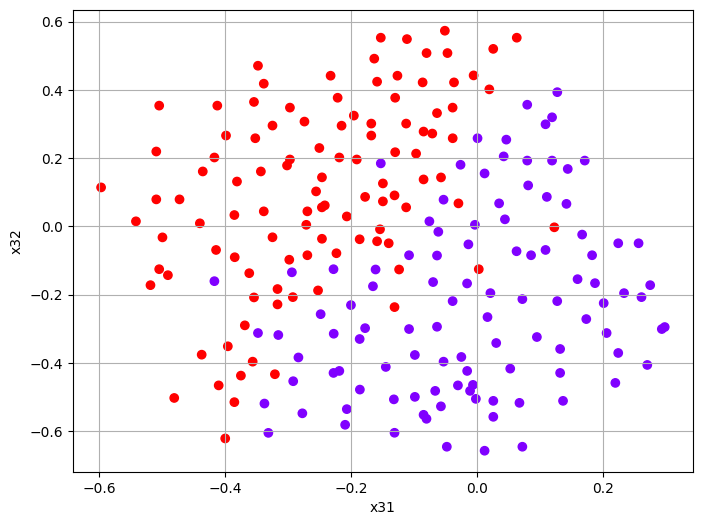

In [ ]:
mat3 = loadmat("/content/drive/MyDrive/ColabNotebooks/s2310041/ex6data3.mat")
mat3.keys()
X3, y3 = mat3["X"], mat3["y"]              # training dataset (211, 2), (211, 1)
Xval, yval = mat3["Xval"], mat3["yval"]     # validation dataset (200, 2), (200, 1)
plt.figure(figsize=(8,6))
plt.scatter(X3[:, 0], X3[:, 1], c=y3.flatten(), cmap="rainbow")
plt.xlabel("x31")
plt.ylabel("x32")
plt.grid(True)
plt.show()

In [ ]:
# find the best C and sigma
C_values = (0.01, 0.03, 0.1, 0.3, 1., 3., 10., 30.)
sigma_values = C_values
best_pair, best_score = (0, 0), 0

for C in C_values:
  for sigma in sigma_values:
    gamma = np.power(sigma,-2)/2
    model = svm.SVC(C=C, kernel="rbf", gamma=gamma)
    model.fit(X3, y3.flatten())
    this_score = model.score(Xval, yval)
    if this_score > best_score:
      best_score = this_score
      best_pair = (C, sigma)


print(f"best pair is {best_pair}. \n best score is {best_score}.")

SVC(C=0.01, gamma=5000.0)

SVC(C=0.01, gamma=555.5555555555555)

SVC(C=0.01, gamma=49.99999999999999)

SVC(C=0.01, gamma=5.555555555555556)

SVC(C=0.01, gamma=0.5)

SVC(C=0.01, gamma=0.05555555555555555)

SVC(C=0.01, gamma=0.005)

SVC(C=0.01, gamma=0.0005555555555555556)

SVC(C=0.03, gamma=5000.0)

SVC(C=0.03, gamma=555.5555555555555)

SVC(C=0.03, gamma=49.99999999999999)

SVC(C=0.03, gamma=5.555555555555556)

SVC(C=0.03, gamma=0.5)

SVC(C=0.03, gamma=0.05555555555555555)

SVC(C=0.03, gamma=0.005)

SVC(C=0.03, gamma=0.0005555555555555556)

SVC(C=0.1, gamma=5000.0)

SVC(C=0.1, gamma=555.5555555555555)

SVC(C=0.1, gamma=49.99999999999999)

SVC(C=0.1, gamma=5.555555555555556)

SVC(C=0.1, gamma=0.5)

SVC(C=0.1, gamma=0.05555555555555555)

SVC(C=0.1, gamma=0.005)

SVC(C=0.1, gamma=0.0005555555555555556)

SVC(C=0.3, gamma=5000.0)

SVC(C=0.3, gamma=555.5555555555555)

SVC(C=0.3, gamma=49.99999999999999)

SVC(C=0.3, gamma=5.555555555555556)

SVC(C=0.3, gamma=0.5)

SVC(C=0.3, gamma=0.05555555555555555)

SVC(C=0.3, gamma=0.005)

SVC(C=0.3, gamma=0.0005555555555555556)

SVC(gamma=5000.0)

SVC(gamma=555.5555555555555)

SVC(gamma=49.99999999999999)

SVC(gamma=5.555555555555556)

SVC(gamma=0.5)

SVC(gamma=0.05555555555555555)

SVC(gamma=0.005)

SVC(gamma=0.0005555555555555556)

SVC(C=3.0, gamma=5000.0)

SVC(C=3.0, gamma=555.5555555555555)

SVC(C=3.0, gamma=49.99999999999999)

SVC(C=3.0, gamma=5.555555555555556)

SVC(C=3.0, gamma=0.5)

SVC(C=3.0, gamma=0.05555555555555555)

SVC(C=3.0, gamma=0.005)

SVC(C=3.0, gamma=0.0005555555555555556)

SVC(C=10.0, gamma=5000.0)

SVC(C=10.0, gamma=555.5555555555555)

SVC(C=10.0, gamma=49.99999999999999)

SVC(C=10.0, gamma=5.555555555555556)

SVC(C=10.0, gamma=0.5)

SVC(C=10.0, gamma=0.05555555555555555)

SVC(C=10.0, gamma=0.005)

SVC(C=10.0, gamma=0.0005555555555555556)

SVC(C=30.0, gamma=5000.0)

SVC(C=30.0, gamma=555.5555555555555)

SVC(C=30.0, gamma=49.99999999999999)

SVC(C=30.0, gamma=5.555555555555556)

SVC(C=30.0, gamma=0.5)

SVC(C=30.0, gamma=0.05555555555555555)

SVC(C=30.0, gamma=0.005)

SVC(C=30.0, gamma=0.0005555555555555556)

best pair is (1.0, 0.1). 
 best score is 0.965.


In [80]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

model3 = svm.SVC(C=1, kernel="rbf", gamma=np.power(0.1, -2.0)/2)
model3.fit(X3, y3.flatten())


SVC(C=1, gamma=49.99999999999999)

array([[109,   4],
       [  3,  84]])

In [119]:
#pred_train = model3.predict(X3)
pred_eval = model3.predict(Xval)

print("confusion matrix is")
#confusion_matrix(y3, pred_train)
confusion_matrix(yval, pred_eval)

print(f"\naccuracy on model3-svm-bf is {accuracy_score(y_true=yval, y_pred=pred_eval)}")

confusion matrix is


array([[109,   4],
       [  3,  84]])


accuracy on model3-svm-bf is 0.965


array([[-0.7161288 , -0.7236845 ],
       [-0.71403844, -0.7236845 ],
       [-0.71194809, -0.7236845 ],
       [-0.70985773, -0.7236845 ],
       [-0.70776738, -0.7236845 ],
       [-0.70567702, -0.7236845 ],
       [-0.70358667, -0.7236845 ],
       [-0.70149631, -0.7236845 ],
       [-0.69940596, -0.7236845 ]])

<Figure size 800x600 with 0 Axes>

Text(0.5, 0, 'x31')

Text(0, 0.5, 'x32')

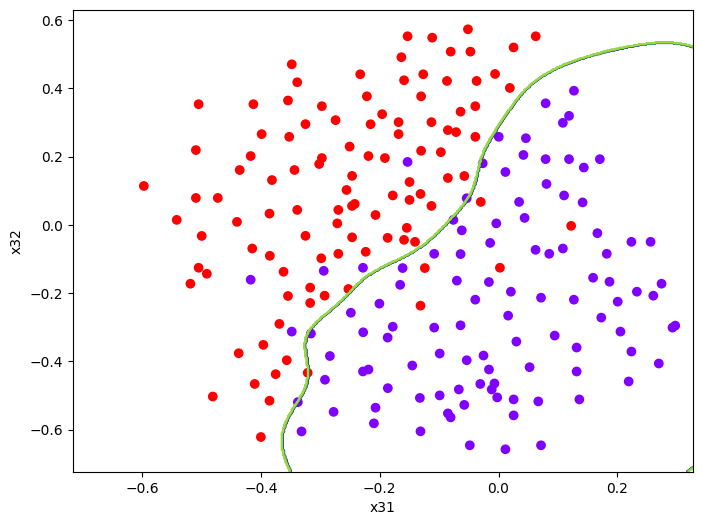

In [ ]:
# create new data
x31_min, x31_max = X3[:, 0].min() * 1.2, X3[:, 0].max() * 1.1
x32_min, x32_max = X3[:, 1].min() * 1.1, X3[:, 1].max() * 1.1
x31, x32 = np.meshgrid(np.linspace(x31_min, x31_max, 500), np.linspace(x32_min, x32_max, 500))       # (500, 500), (500, 500)
data3 = np.c_[x31.ravel(), x32.ravel()]                                                              # (250000,2)
data3[:9]

plt.figure(figsize=(8,6))
plt.scatter(X3[:, 0], X3[:, 1], c=y3.flatten(), cmap="rainbow")
plt.xlabel("x31")
plt.ylabel("x32")

Z3 = model3.predict(data3)
Z3 = Z3.reshape(x31.shape)
plt.contour(x31,x32, Z3)
plt.show()


### 3.2 Try Naive Bayes

<Figure size 800x600 with 0 Axes>

Text(0.5, 0, 'x31')

Text(0, 0.5, 'x32')

shape of Z3_bayes is (250000,)


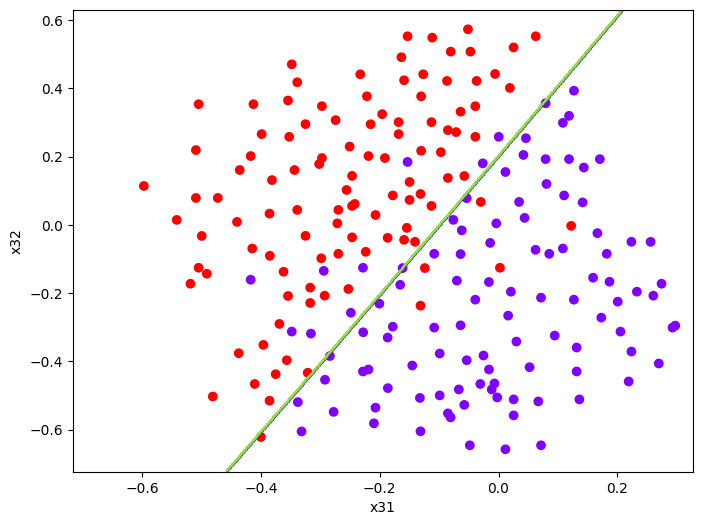

In [77]:
from sklearn.naive_bayes import GaussianNB

bayes_model3 = GaussianNB()
bayes_clf3 = bayes_model3.fit(X3, y3.flatten())

plt.figure(figsize=(8,6))
plt.scatter(X3[:, 0], X3[:, 1], c=y3.flatten(), cmap="rainbow")
plt.xlabel("x31")
plt.ylabel("x32")
Z3_bayes = bayes_clf3.predict(data3)                   # use trained clf to do prediction on the created 25000 instance.
print(f'shape of Z3_bayes is {Z3_bayes.shape}')        # (250000,)
Z3_bayes = Z3_bayes.reshape(x31.shape)                   # reshape predicted results as the same shape as x21 to plot the decision boundary.
plt.contour(x31, x32, Z3_bayes)
plt.show()

In [79]:
bayes_pred = bayes_clf3.predict(Xval)
accuracy_score(y_true=yval, y_pred=bayes_pred)

0.93

# 4 Classification of text documents using sparse features -- using 20 newsgroups dataset


*   18,000 newsgroups posts on 20 topics
*   2 subsets: training, testing
*   4 classes





 [reference: sklearn tutorial](https://scikit-learn.org/stable/auto_examples/text/plot_document_classification_20newsgroups.html#plot-accuracy-training-and-test-time-of-each-classifier)


In [ ]:
from time import time

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer


# select data from  4 categories
categories = ["alt.atheism","talk.religion.misc","comp.graphics","sci.space"]

def size_mb(docs):
  return sum(len(s.encode("utf-8")) for s in docs)/1e6

def load_dataset(verbose=False, remove=()):
  """
  load and vectorize 20 newsgroup dataset"""
  train_data = fetch_20newsgroups(
      subset= "train",
      categories= categories,
      shuffle=True,
      random_state=123,
      remove=remove,
  )

  test_data = fetch_20newsgroups(
      subset="test",
      categories=categories,
      shuffle=True,
      random_state=123,
      remove=remove,
  )

  # target names in train data
  target_names = train_data.target_names

  # target labels
  y_train, y_test = train_data.target, test_data.target

  # extracting features from training data using a sparse vectorizer
  ts = time()

  # convert a collection of raw documents to a matrix of TF-IDF features.
  # terms with df>0.5 will be ignored when building vocab;
  # apply sublinear ft scaling == replace tf with 1+log(tf)
  vectorizer = TfidfVectorizer(
      sublinear_tf=True,
      max_df=0.5,
      min_df=5,
      stop_words="english"
  )
  X_train = vectorizer.fit_transform(train_data.data)    # learn vocabulary and idf, return document-term matrix.
  print(f"size of vovabulary built from training set: {len(vectorizer.get_feature_names_out())} \n X_train shape: {X_train.shape} matrix.")
  duration_train = time()-ts


  # extracting features from testing data
  ts = time()
  X_test = vectorizer.transform(test_data.data)   # transform documents to df matrix
  duration_test = time()-ts

  # get transformed featrue names
  feature_names = vectorizer.get_feature_names_out()


  if verbose:
    # compute size of loaded data
    train_size_mb = size_mb(train_data.data)
    test_size_mb = size_mb(test_data.data)

    print(
        f"{len(train_data.data)} documents - {train_size_mb:.2f}MB (trianning set).\n {len(test_data.data)} documents - {test_size_mb:.2f}MB (testing set)."
    )
    print(f"{len(target_names)} categories.")
    print(
        f"vectorize training done in {duration_train:.3f}s at {train_size_mb / duration_train:.3f}MB/s.\n"
        f"n_samples: {X_train.shape[0]}, n_features: {X_train.shape[1]}")

    print(f"vectorize testing done in {duration_test:.3f}s at {test_size_mb / duration_test:.3f}MB/s.\n"
    f"n_samples: {X_test.shape[0]}, n_features: {X_test.shape[1]}")

  return X_train, X_test, y_train, y_test, feature_names, target_names


In [ ]:
X_train, X_test, y_train, y_test, feature_names, target_names = load_dataset(verbose=True)

size of vovabulary built from training set: 7831 
 X_train shape: (2034, 7831) matrix.
2034 documents - 3.98MB (trianning set).
 1353 documents - 2.87MB (testing set).
4 categories.
vectorize training done in 0.668s at 5.960MB/s.
n_samples: 2034, n_features: 7831
vectorize testing done in 0.382s at 7.509MB/s.
n_samples: 1353, n_features: 7831


In [ ]:
type(X_train)
print(f"\n")
X_test.size
print(f"\n")
feature_names

scipy.sparse._csr.csr_matrix

120344

array(['00', '000', '0005', ..., 'zoo', 'zoology', 'zyeh'], dtype=object)

### 4.1 ridge classifier


*   linear classificaiton model which use mean squared error on {-1,1} encoded taegets, one for each possible class.
*   not provide predict_prob method
*   faster to train











RidgeClassifier(solver='sparse_cg', tol=0.01)

[Text(0, 0, 'alt.atheism'),
 Text(1, 0, 'comp.graphics'),
 Text(2, 0, 'sci.space'),
 Text(3, 0, 'talk.religion.misc')]

[Text(0, 0, 'alt.atheism'),
 Text(0, 1, 'comp.graphics'),
 Text(0, 2, 'sci.space'),
 Text(0, 3, 'talk.religion.misc')]

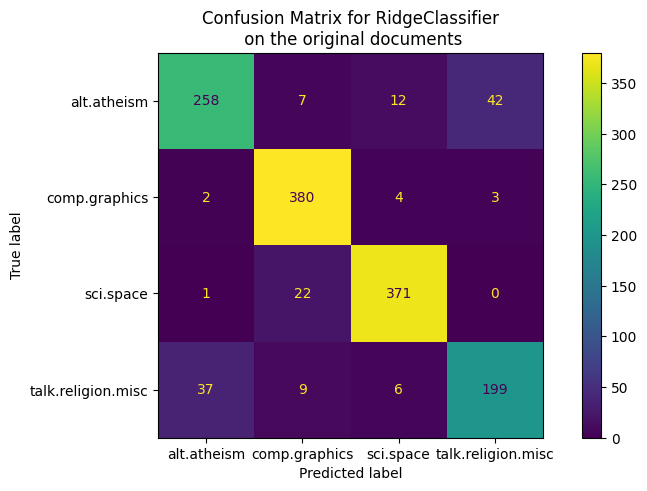

In [ ]:
# plot confusion matrix  to see if there is a pattern in the classification errors
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import ConfusionMatrixDisplay


ridge_clf = RidgeClassifier(tol = 1e-2, solver="sparse_cg")
ridge_clf.fit(X_train,y_train)
ridge_pred = ridge_clf.predict(X_test)

fig, ax = plt.subplots(figsize=(10,5))
ConfusionMatrixDisplay.from_predictions(y_test, ridge_pred, ax=ax)
ax.xaxis.set_ticklabels(target_names)
ax.yaxis.set_ticklabels(target_names)
_ = ax.set_title(
    f"Confusion Matrix for {ridge_clf.__class__.__name__}\n on the original documents"
)

### 4.2 look into how ridge classifier makes its decision by looking at the words with highest average feature effects

top 5 keywords per class:
  alt.atheism comp.graphics sci.space talk.religion.misc
0       keith      graphics     space          christian
1         god    university      nasa                com
2    atheists        thanks     orbit                god
3      people          does      moon           morality
4     caltech         image    access             people


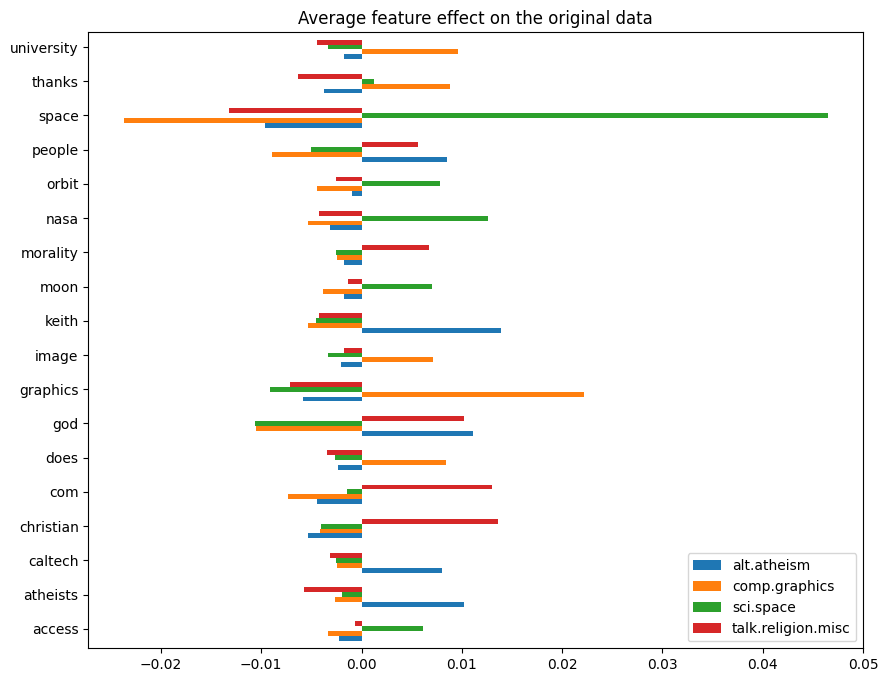

In [ ]:
import numpy as np
import pandas as pd

def plot_feat_effects(clf):
  # learned coefficients weighted by frequency of appearance
  average_feat_effects = clf.coef_ * np.asarray(X_train.mean(axis=0)).ravel()     # (7831,)

  for i, label in enumerate(target_names):
    top5 = np.argsort(average_feat_effects[i])[-5:][::-1]
    if i == 0:
      top = pd.DataFrame(feature_names[top5], columns=[label])
      top_idx = top5
    else:
      top[label] = feature_names[top5]
      top_idx = np.concatenate((top_idx, top5), axis=None)

  top_idx = np.unique(top_idx)
  predictive_words = feature_names[top_idx]


  # plot featrue effects
  bar_size, padding = 0.25, 0.75
  y_locs = np.arange(len(top_idx)) * (4*bar_size+padding)

  fig, ax = plt.subplots(figsize=(10,8))
  for i, label in enumerate(target_names):
    ax.barh(
        y_locs + (i-2) * bar_size,
        average_feat_effects[i,top_idx],
        height = bar_size,
        label = label,
    )

  ax.set(
      yticks=y_locs,
      yticklabels=predictive_words,
      ylim=[
          0 - 4 * bar_size,
          len(top_idx) * (4 * bar_size + padding) - 4 * bar_size,
      ],
  )
  ax.legend(loc="lower right")

  print("top 5 keywords per class:")
  print(top)

  return ax


_ = plot_feat_effects(ridge_clf).set_title("Average feature effect on the original data")

### 4.3 Try different svm

In [ ]:
# build ridge classifier
from sklearn.linear_model import RidgeClassifier
from sklearn import svm

C=1.0
models = (
    svm.SVC(kernel="linear", C=C),
    svm.LinearSVC(C=C, max_iter=10000),
    svm.SVC(C=C, kernel="rbf"),
    RidgeClassifier(tol = 1e-2, solver="sparse_cg"),

)

models = (clf.fit(X_train,y_train) for clf in models)


In [ ]:
from sklearn.metrics import accuracy_score

pred_scores = []
for model in models:
  pred = model.predict(X_test)
  score = accuracy_score(y_true=y_test, y_pred=pred)
  pred_scores.append(score)

pred_scores

[0.893569844789357, 0.893569844789357, 0.8928307464892831, 0.8928307464892831]